In [1]:
import sympy as sym
from IPython.display import display,Math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [5]:
x = sym.symbols('x')
fx = x**2
dfx = sym.diff(fx)

In [6]:
# leibniz notation (germany)
display(Math('f(x) = %s \\quad \\frac{df}{fx}=%s'%(sym.latex(fx),sym.latex(dfx))))

<IPython.core.display.Math object>

In [7]:
# logrange notation (english)
display(Math('f(x) = %s \\quad f\'=%s'%(sym.latex(fx),sym.latex(dfx))))
# f prime

<IPython.core.display.Math object>

In [8]:
# newton notations(france)
display(Math('f(x) = %s \\quad \\dot{f}=%s'%(sym.latex(fx),sym.latex(dfx))))



<IPython.core.display.Math object>

In [9]:
import sympy.plotting.plot as symplot

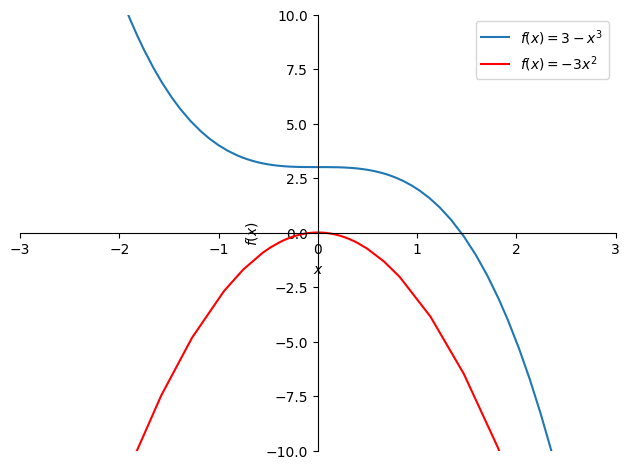

In [17]:
fx = 3 - x**3

p = symplot(fx, (x,-3,3),show=False)
p.extend(symplot(sym.diff(fx),show=False))
p[1].line_color = 'r'
p[0].label='$f(x) = %s$' % sym.latex(fx)
p[1].label='$f(x) = %s$' % sym.latex(sym.diff(fx))
p.legend = True
p.ylim = [-10,10]
p.xlim = [-3,3]

p.show()

In [18]:
x = sym.symbols('x')
f = 3 + 2*x - 5*x**2 + 7*x**4
g = 4*x**2 + x**5


In [23]:
df = sym.diff(f)
dg = sym.diff(g)

d_fxg = sym.diff(f*g)
df_x_dg = sym.diff(f) * sym.diff(g)

d_fplus_g = sym.diff(f+g)

display(Math('\\text{without applying the product rule.}'))
display(Math('\\quad (f\\times g)\' = %s' % sym.latex(sym.expand(d_fxg))))
display(Math('\\quad f\'\\times g\' = %s'% sym.latex(sym.expand(df_x_dg))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
display(Math('\\text{with applying the product rule.}'))
display(Math('\\quad (f\\times g)\' = %s' % sym.latex(sym.expand(d_fxg))))
display(Math('\\quad f\'\\times g + f\\times g\' = %s'% sym.latex(sym.expand(df*g + f*dg))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
display(Math('(f+g)\' = %s' %(sym.latex(sym.expand(d_fplus_g)))))

<IPython.core.display.Math object>

In [ ]:
display(Math('(f+g)\' = %s' %(sym.latex(sym.expand(d_fplus_g)))))